# Web Scraping: Simple Text Extraction

Scrape the the text from a blog about AI tools for marketing. The site has a scraping blocker but it can be outsmarted by a header that is passed along the get command, which will basically make our queries to the website look like they are coming from an actual browser (see [this excellent blogpost](https://towardsdatascience.com/looking-for-a-house-build-a-web-scraper-to-help-you-5ab25badc83e) for reference). 

**Data Sources**

- `https://www.nexoya.com/blog/ai-marketing-tools-that-you-need-to-know/`

**Changes**

- 2019-06-12: Write an run the script


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries,-load-data" data-toc-modified-id="Import-libraries,-load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries, load data</a></span></li><li><span><a href="#1)-Scrape-Employee-Data,-Create-Adressbook" data-toc-modified-id="1)-Scrape-Employee-Data,-Create-Adressbook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1) Scrape Employee-Data, Create Adressbook</a></span></li></ul></div>

---

## Import libraries, load data

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

# My functions
import EDA_functions as EDA
import cleaning_functions as cleaning

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns #, sns.set_style('whitegrid')
color = 'rebeccapurple'
%matplotlib inline

# Display settings
from IPython.display import display
pd.options.display.max_columns = 100

## 1) Scrape Employee-Data, Create Adressbook

In [21]:
"""Blocked attempt"""

# Fetch web directly
response = requests.get("https://www.nexoya.com/blog/ai-marketing-tools-that-you-need-to-know/")

In [22]:
# Make soup, pass text of content
soup = BeautifulSoup(response.text, "lxml")
type(soup)

bs4.BeautifulSoup

In [23]:
# Output soup
soup

<html>
<head><title>403 Forbidden</title></head>
<body bgcolor="white">
<center><h1>403 Forbidden</h1></center>
<hr/><center>nginx</center>
</body>
</html>

Scraping is blocked!

In [24]:
"""Indirect attempt"""

# Formulate headers to get around scraping blocker
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

# Fetch web page with header passed
url = "https://www.nexoya.com/blog/ai-marketing-tools-that-you-need-to-know/"
response = requests.get(url, headers=headers)

In [25]:
# Make soup, pass text of content
soup = BeautifulSoup(response.text, "lxml")
type(soup)

bs4.BeautifulSoup

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="wordpress" name="generator"/>\n  <script data-cfasync="false" id="ao_optimized_gfonts_config" type="text/javascript">\n   WebFontConfig={google:{families:["Abel","Abel"] },classes:false, events:false, timeout:1500};\n  </script>\n  <link href="https://www.nexoya.com/xmlrpc.php" rel="pingback"/>\n  <style media="all" type="text/css">\n   .heateor_sss_horizontal_sharing .heateorSssSharing{color:#fff;border-width:0;border-style:solid;border-color:transparent}.heateor_sss_horizontal_sharing .heateorSssTCBackground{color:#666}.heateor_sss_horizontal_sharing .heateorSssSharing:hover{border-color:transparent}.heateor_sss_vertical_sharing .heateorSssSharing{color:#fff;border-width:0;border-style:solid;border-color:transparent}.heateor_sss_vertical_sharing .heateorSs
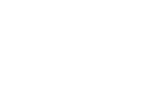
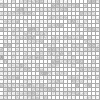

In [17]:
# Output soup
soup

In [47]:
# Inspect the first employee to find selectors for the different attributes
# Note: Make sure to use print() to ensure whitespace is displayed properly
print(employees[3].prettify())

<div class="BasicGridModule base-teaser EmployeeTeaserModule mini" data-filters="1652,employee,0" data-group="A">
 <div class="inner">
  <div class="media-con">
   <div aria-label="Adam Cornfield from Implement Consulting Group" class="media image" data-aspect="11/12" data-crop="true" data-focal="0.18666666666666668,0.52" data-res="1500,1500" data-size="cover" data-url="/media/3492/adco_01390.jpg" role="img" style="padding-top:109.0909%;" title="Adam Cornfield from Implement Consulting Group">
    <noscript>
     <img alt="Adam Cornfield from Implement Consulting Group" src="/media/3492/adco_01390.jpg?width=1500&amp;height=1500&amp;center=0.18666666666666668,0.52&amp;mode=crop&amp;cropmode=percentage"/>
    </noscript>
   </div>
  </div>
  <div class="copy">
   <h4>
    Adam Cornfield
   </h4>
   <div class="text">
    <a href="tel:+45 2338 0025">
     +45 2338 0025
    </a>
    <br/>
    <a href="mailto:adco@implement.dk">
     adco@implement.dk
    </a>
   </div>
  </div>
 </div>
</d

In [46]:
# Test output on first employee
print(employees[3].select_one("h4").get_text().strip())
links = employees[3].find_all('a')
for link in links:
    text = link.get_text()
    if text != "LinkedIn":
        print(text)
    else:
        print(link['href'])

Adam Cornfield
+45 2338 0025
adco@implement.dk


In [62]:
# Store Contact Details for Employees in DataFrame

employees_list = []

for employee in employees:
    name = employee.select_one("h4").get_text().strip()
    given, last = name.split(' ', 1)
    links = employee.find_all('a')
    for e, link in enumerate(links):
        if e == 0:
            phone = link.get_text().strip()
        if e == 1:
            mail = link.get_text().strip()
        else:
            if len(links) == 2:
                linkedIn = ''
            else:
                linkedIn = link['href']
            
    employees_list.append({'Given Name': given,
                           'Last Name': last,
                           'Phone': phone,
                           'E-Mail': mail,
                           'LinkedIn Profile': linkedIn
                          })        

adressbook = pd.DataFrame(employees_list, columns = employees_list[0].keys())

In [100]:
# Create a country column
adressbook['Country'] = adressbook['E-Mail'].str.split('.').str.get(1).str.upper()
adressbook['Country'].value_counts()

# Check results
len(adressbook)
display(adressbook.head())

,Given Name,Last Name,Phone,E-Mail,LinkedIn Profile,Country
0,Aage,Lemche-Romvig,+45 3085 8012,alr@implement.dk,https://dk.linkedin.com/in/romvig,DK
1,Abtin,Salahshor,+46 0722 391338,absa@implement.dk,https://www.linkedin.com/in/abtinsalahshor/,DK
2,Adam,Cederholm,+46 704 225 404,adce@implement.se,https://www.linkedin.com/in/adam-cederholm-207...,SE
3,Adam,Cornfield,+45 2338 0025,adco@implement.dk,,DK
4,Adam,Hede,+45 3095 3195,adhe@implement.dk,https://www.linkedin.com/in/adamhede/,DK


---